In [188]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [189]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [190]:
# 결측치 확인 :  결측치 없음
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [191]:
# 데이터 기술 통계량
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


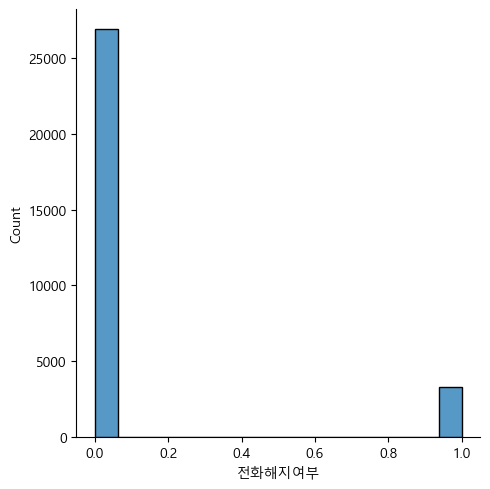

In [192]:
## 시각화
# 종속 변수 분포 확인
# 해지 1, 유지 0
plt.rc('font', family='Malgun Gothic')
sns.displot(x = train['전화해지여부'])
plt.show()

In [193]:
# 해지 수 count
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [194]:
train['주간통화시간'].value_counts(sort=True)


224.0    204
223.8    202
223.5    198
223.7    195
224.1    194
        ... 
198.2      1
423.0      1
131.7      1
476.7      1
164.7      1
Name: 주간통화시간, Length: 2771, dtype: int64

In [195]:
train[train['주간통화시간'] >200] 

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
6,TRAIN_00006,89,1,228.8,83,82.3,289.9,23,29.86,283.2,221,8.92,2,0
7,TRAIN_00007,290,1,223.9,99,31.0,294.2,203,26.82,290.1,209,22.66,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [196]:
# 통화 시간 200 이상일 시 해지 여부
train[(train['전화해지여부']==1) & (train['주간통화시간']>200)]

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
61,TRAIN_00061,488,0,444.9,489,45.1,449.1,444,49.44,446.0,409,8.48,4,1
69,TRAIN_00069,98,0,269.7,220,29.8,288.4,220,29.86,230.7,63,8.02,2,1
70,TRAIN_00070,222,0,220.4,69,24.0,230.8,223,29.33,238.0,222,6.22,2,1
94,TRAIN_00094,99,1,236.5,22,24.4,223.9,204,23.23,233.8,23,20.32,3,1
103,TRAIN_00103,68,0,262.8,86,33.5,288.1,86,28.28,290.2,82,8.82,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,TRAIN_30150,76,1,299.8,125,51.8,227.1,93,19.27,211.7,135,9.48,0,1
30166,TRAIN_30166,47,0,449.9,84,44.8,446.3,80,48.09,450.5,85,40.80,8,1
30169,TRAIN_30169,99,0,328.9,62,87.0,202.8,321,32.68,324.0,320,9.98,2,1
30176,TRAIN_30176,94,1,228.2,62,36.5,202.8,221,22.63,222.5,220,9.93,2,1


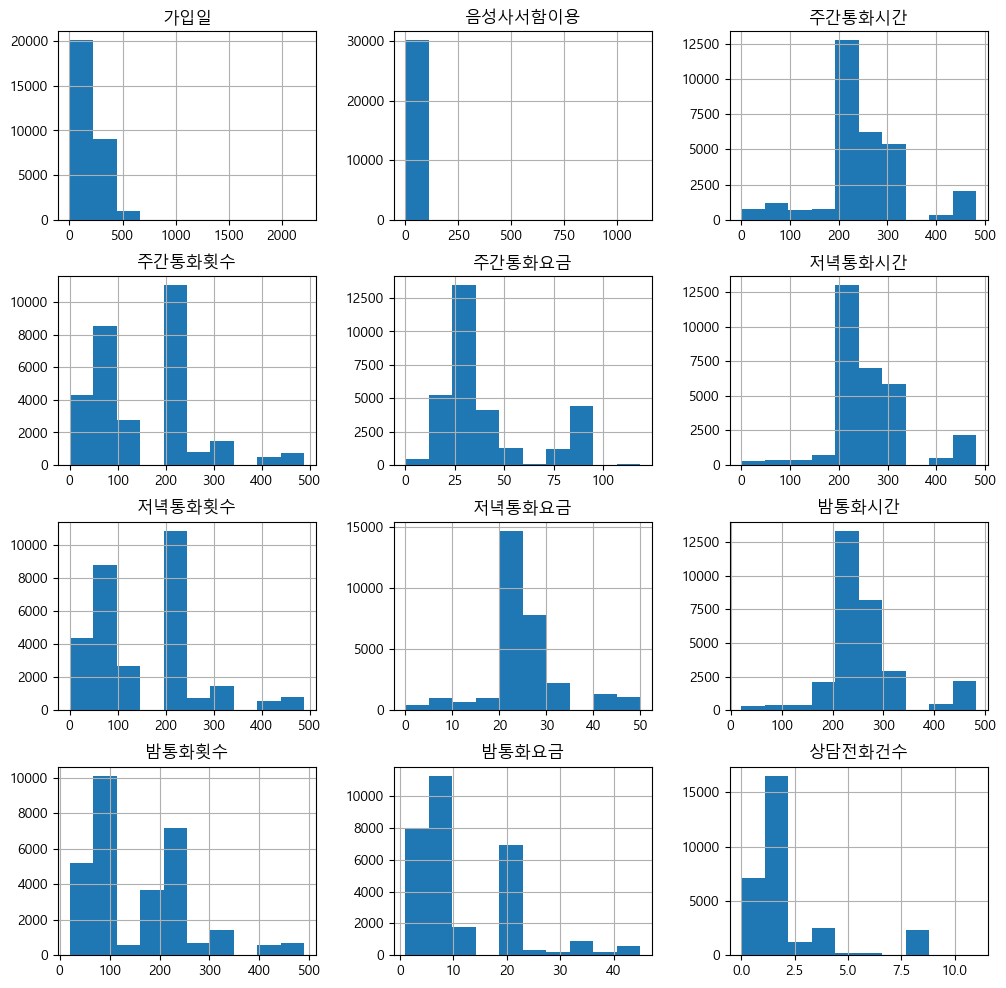

In [197]:
# 전체 데이터 분포 확인
plt.rc('font', family='Malgun Gothic')
except_cancel = train.drop('전화해지여부', axis=1)
except_cancel.hist(figsize=(12,12))
plt.show()


In [198]:
# # 상담전화건수에 따른 전화해지 여부
# fig, ax = plt.subplots(figsize=(7,4), dpi =100)

# cancel_customcall = train[train['전화해지여부']==1].groupby('상담전화건수')['전화해지여부'].count()
# cancel_customcall.plot()
train[train['전화해지여부']==1].groupby('상담전화건수')['전화해지여부'].count()

상담전화건수
0      607
1       80
2     1678
3      194
4      252
5       58
6      112
7        7
8      313
9       15
11       2
Name: 전화해지여부, dtype: int64

In [199]:
train[train['전화해지여부']==0].groupby('상담전화건수')['전화해지여부'].count()

상담전화건수
0      5696
1       754
2     14844
3       986
4      2288
5       176
6        91
7         6
8      2021
9         3
11       17
Name: 전화해지여부, dtype: int64

In [200]:
train[train['전화해지여부']==1].groupby('주간통화시간')['전화해지여부'].count()

주간통화시간
0.1      2
0.6      1
0.9      1
1.1      1
1.3      1
        ..
478.4    1
478.9    1
479.6    2
480.7    1
481.9    1
Name: 전화해지여부, Length: 1172, dtype: int64

<AxesSubplot:xlabel='전화해지여부', ylabel='음성사서함이용'>

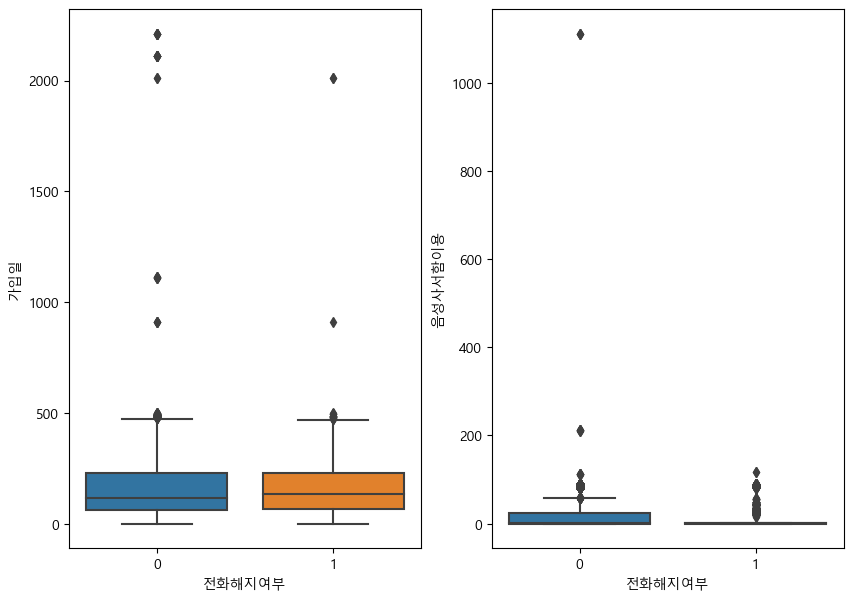

In [201]:
# 이상치 확인
fig, ax = plt.subplots(1,2,figsize=(10,7))

sns.boxplot(x=train['전화해지여부'], y=train['가입일'], ax=ax[0])
sns.boxplot(x=train['전화해지여부'], y=train['음성사서함이용'], ax=ax[1])

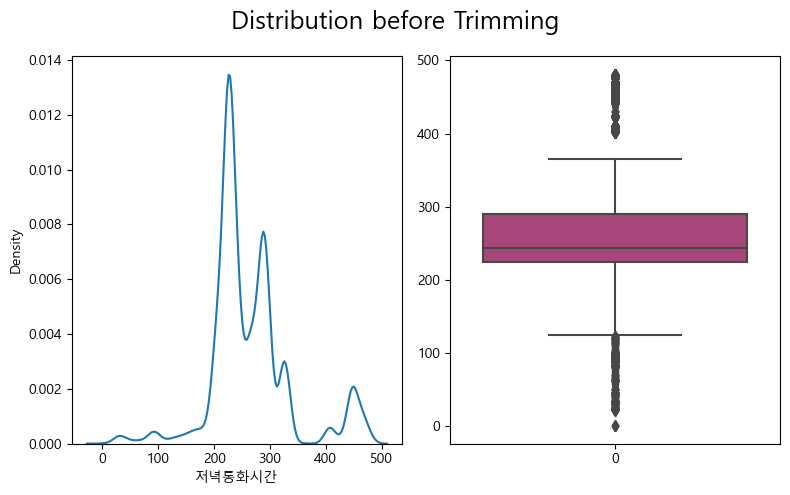

In [202]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data =train["저녁통화시간"])
plt.subplot(1,2,2)
sns.boxplot(data = train["저녁통화시간"], palette="magma")
plt.tight_layout()
plt.show()

In [203]:
q1 = train["저녁통화시간"].quantile(0.25)
q2 = train["저녁통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new = train[(min_limit<=train["저녁통화시간"]) & (train["저녁통화시간"]<=max_limit)]

In [204]:
df_new

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


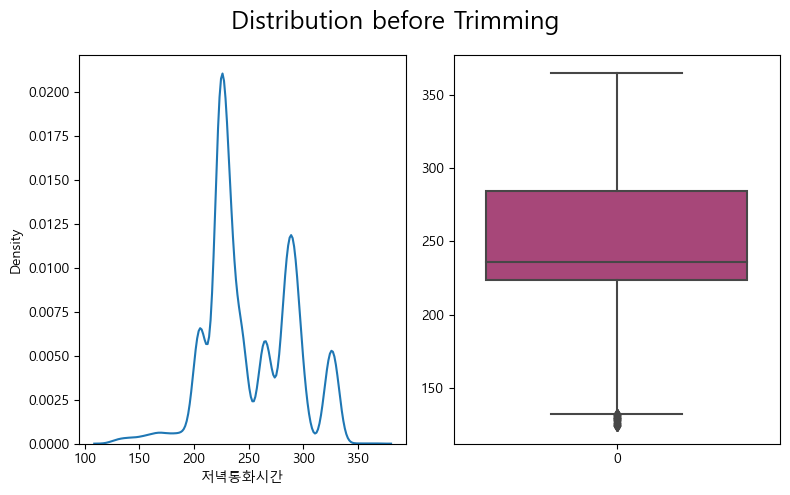

In [205]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data =df_new["저녁통화시간"])
plt.subplot(1,2,2)
sns.boxplot(data = df_new["저녁통화시간"], palette="magma")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화횟수'>

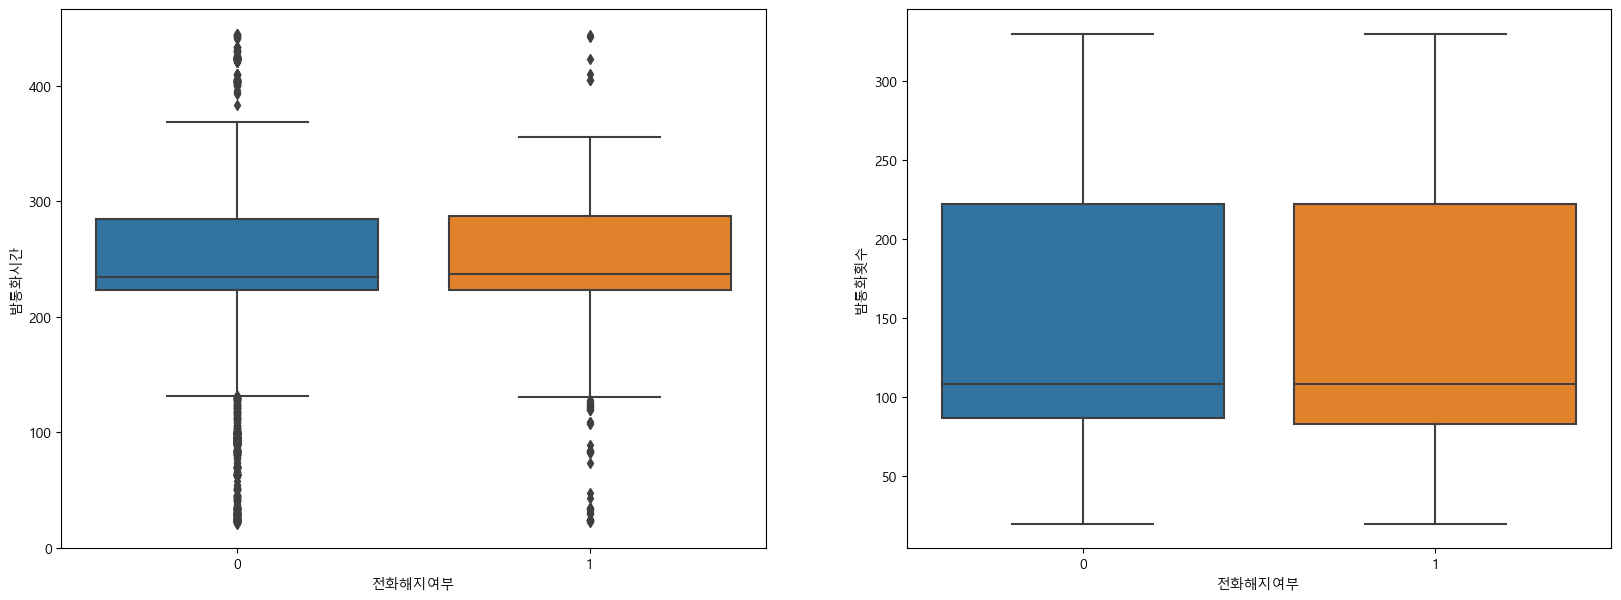

In [206]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x=df_new['전화해지여부'], y=df_new['밤통화시간'], ax=ax[0])
sns.boxplot(x=df_new['전화해지여부'], y=df_new['밤통화횟수'], ax=ax[1])

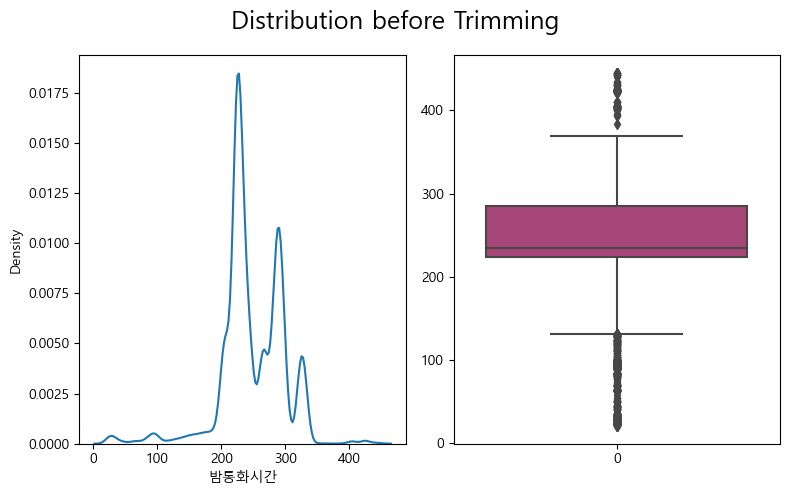

In [207]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data =df_new['밤통화시간'])
plt.subplot(1,2,2)
sns.boxplot(data = df_new['밤통화시간'], palette="magma")
plt.tight_layout()
plt.show()

In [208]:
q1 = df_new["밤통화시간"].quantile(0.25)
q2 = df_new["밤통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new2 = df_new[(min_limit<=df_new["밤통화시간"]) & (df_new["밤통화시간"]<=max_limit)]

In [209]:
df_new2

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화횟수'>

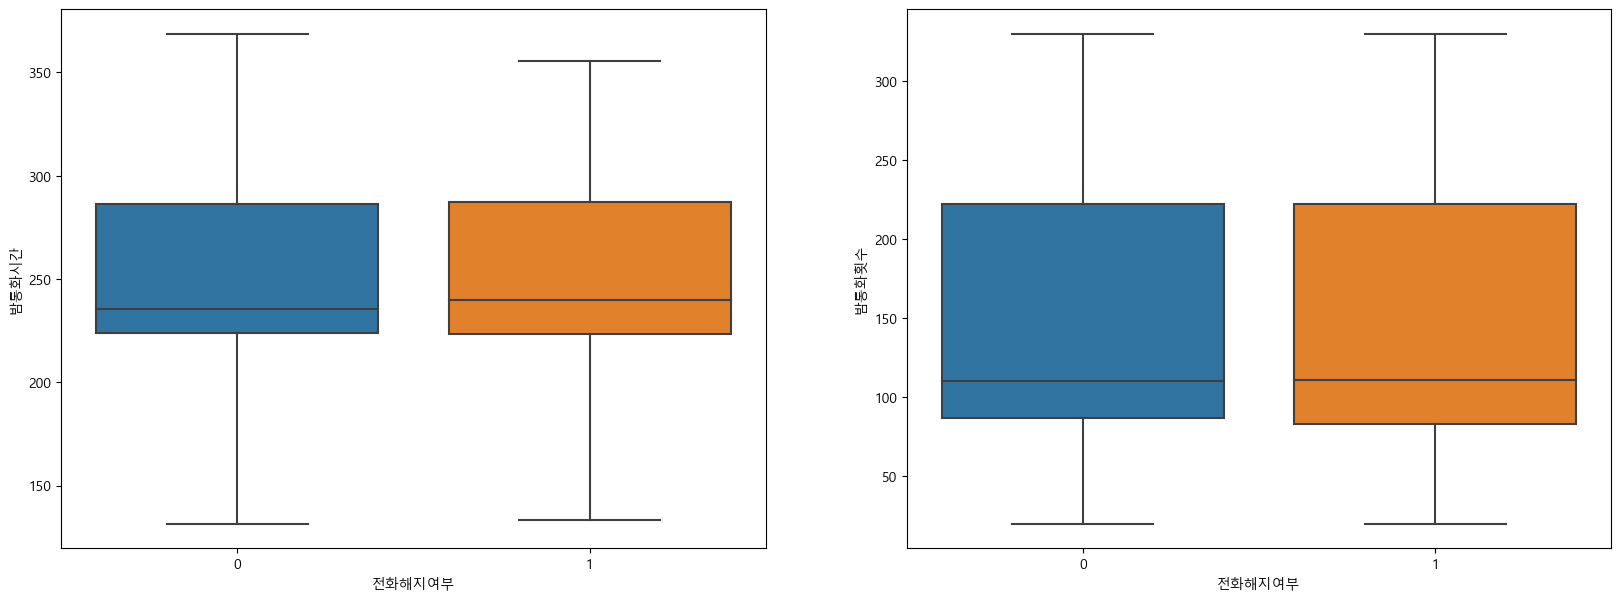

In [210]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화시간'], ax=ax[0])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화횟수'], ax=ax[1])

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화요금'>

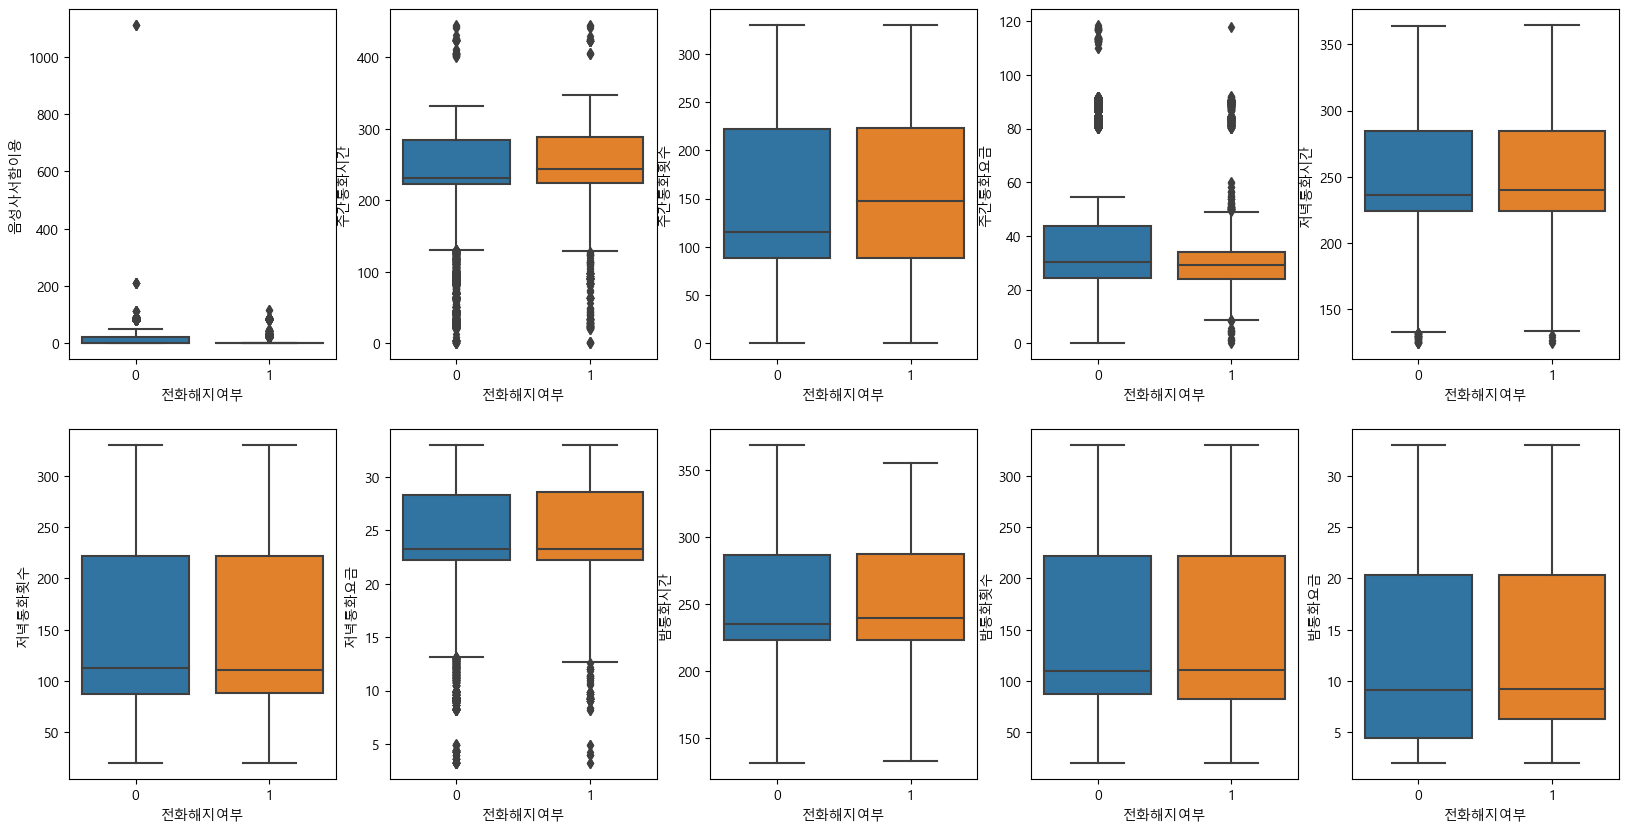

In [211]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화요금'], ax=ax[1][4])


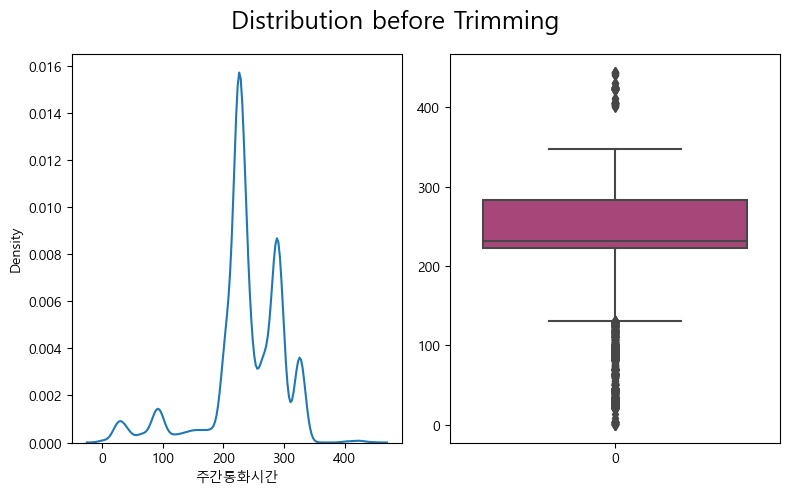

In [212]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data =df_new2['주간통화시간'])
plt.subplot(1,2,2)
sns.boxplot(data = df_new2['주간통화시간'], palette="magma")
plt.tight_layout()
plt.show()

In [213]:
q1 = df_new2["주간통화시간"].quantile(0.25)
q2 = df_new2["주간통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new2[(min_limit<=df_new2["주간통화시간"]) & (df_new2["주간통화시간"]<=max_limit)]

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화요금'>

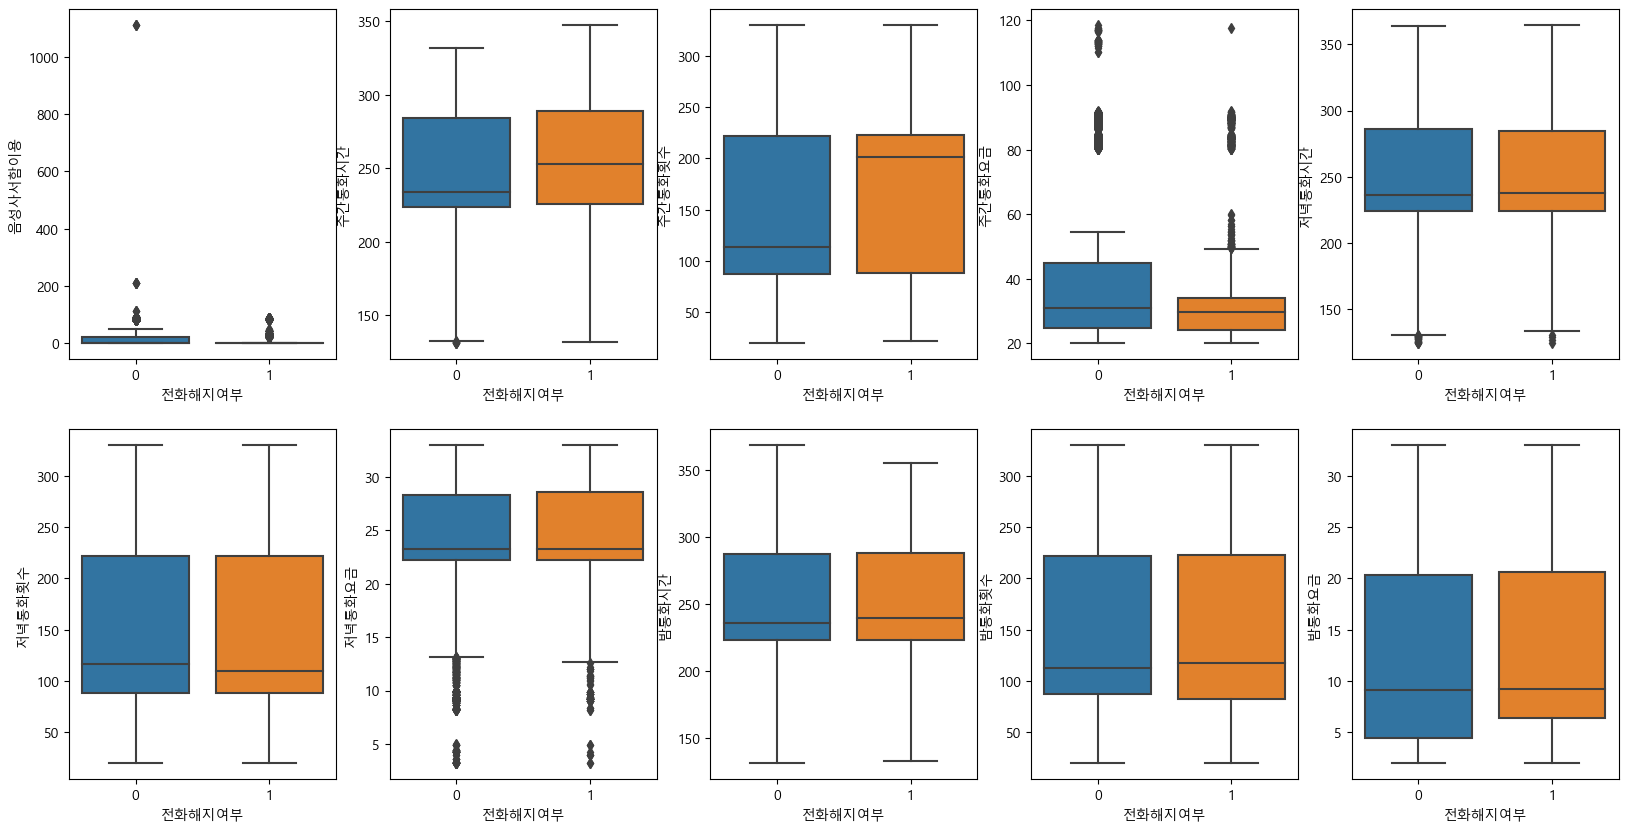

In [214]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화요금'], ax=ax[1][4])


In [215]:
q1 = df_new3["저녁통화요금"].quantile(0.25)
q2 = df_new3["저녁통화요금"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new3[(min_limit<=df_new3["저녁통화요금"]) & (df_new3["저녁통화요금"]<=max_limit)]

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화요금'>

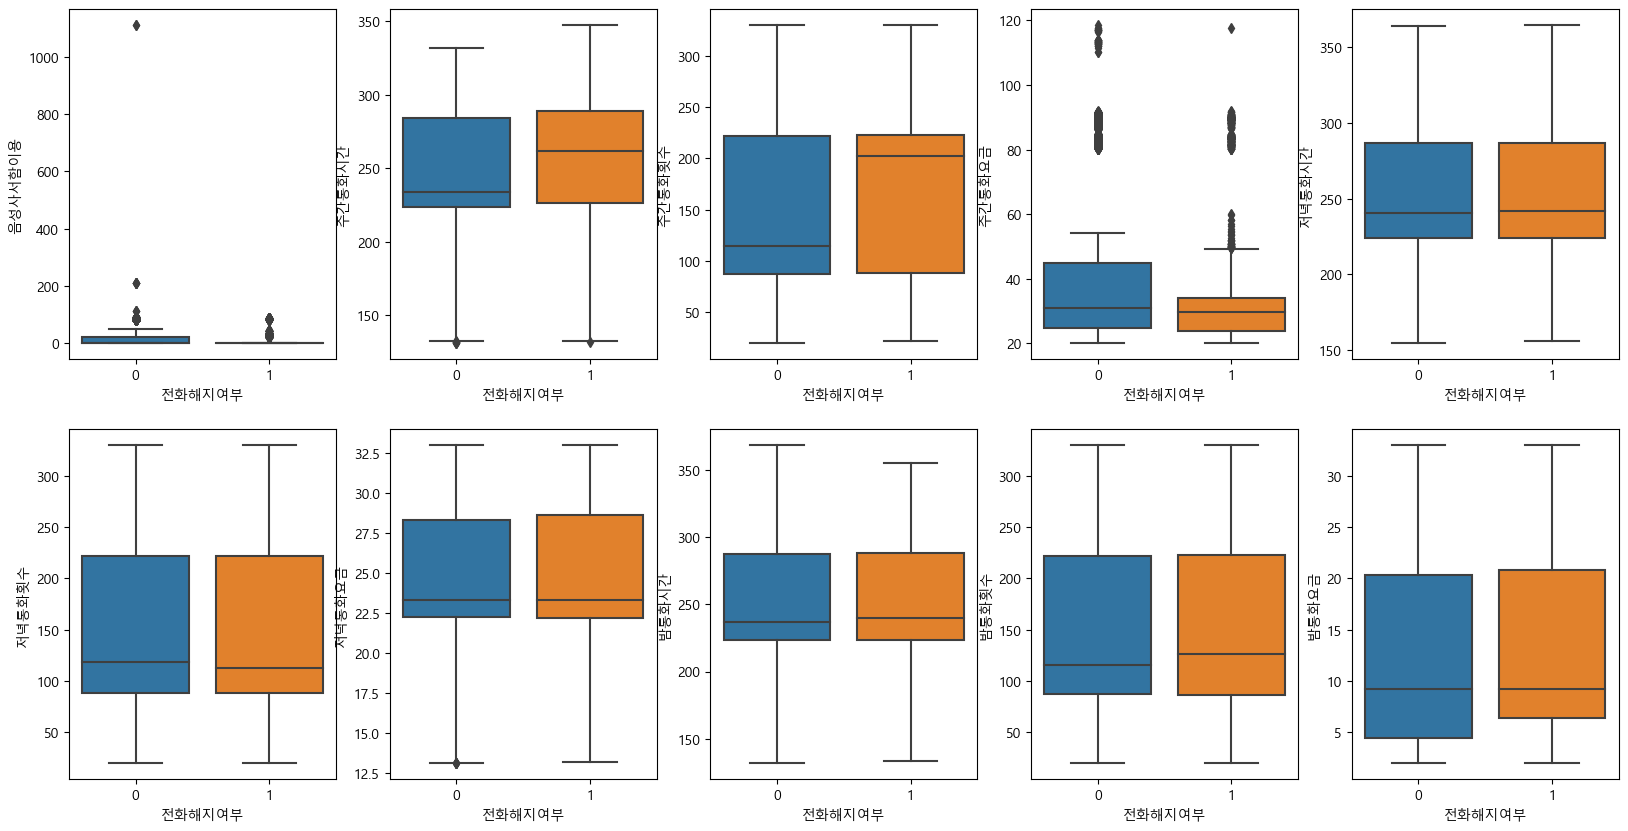

In [216]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화요금'], ax=ax[1][4])

In [217]:
q1 = df_new3["주간통화요금"].quantile(0.25)
q2 = df_new3["주간통화요금"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new3[(min_limit<=df_new3["주간통화요금"]) & (df_new3["주간통화요금"]<=max_limit)]

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화요금'>

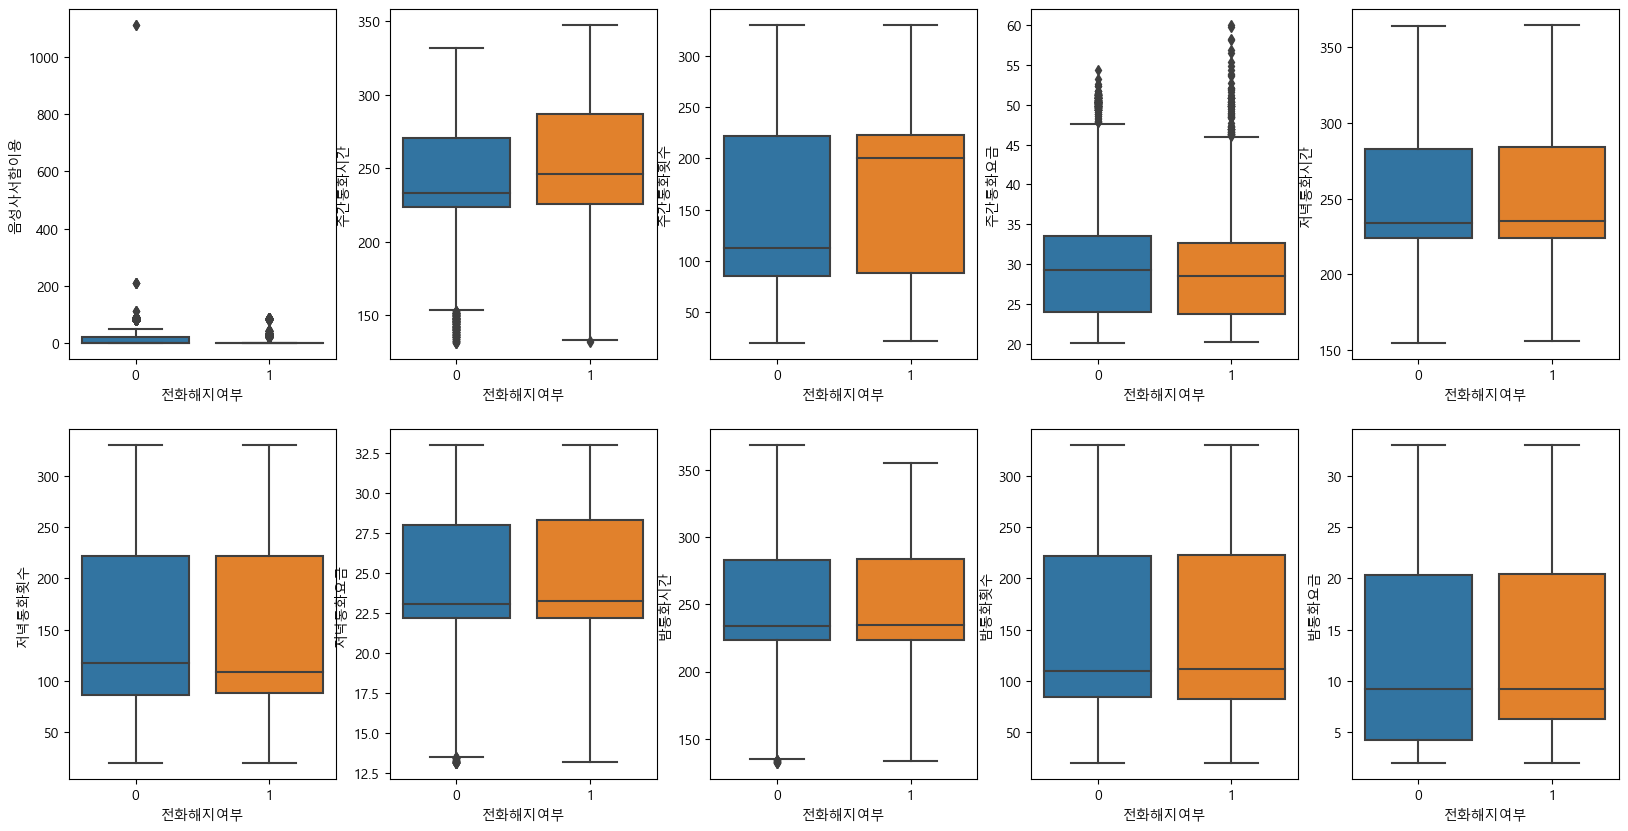

In [218]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화요금'], ax=ax[1][4])

<AxesSubplot:>

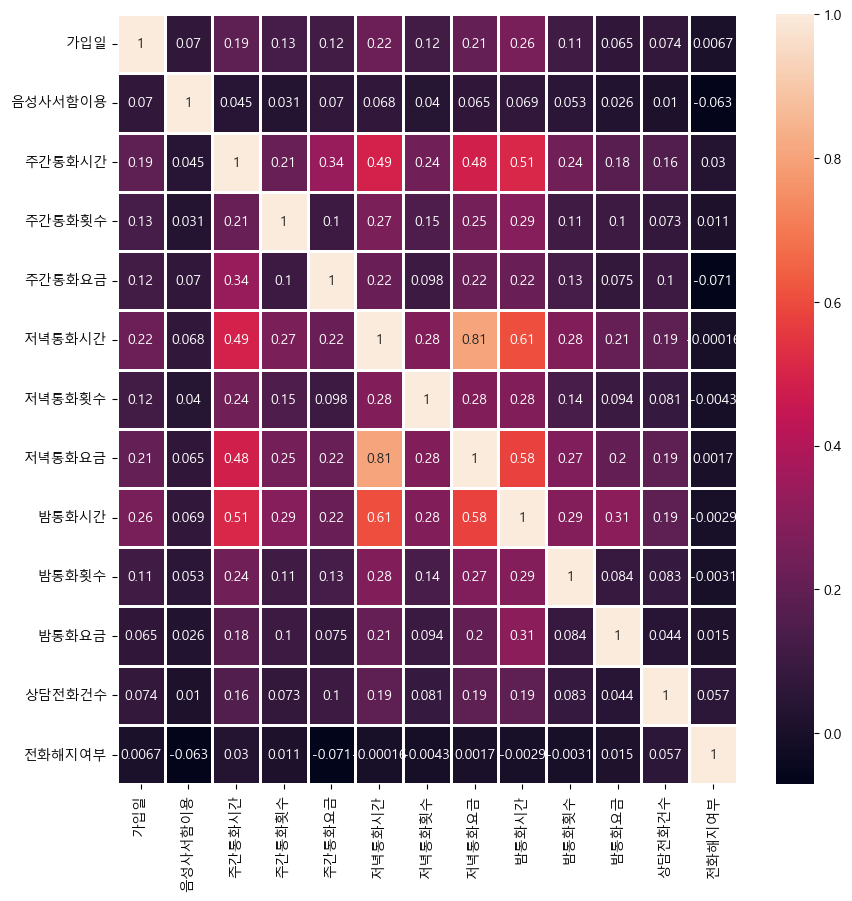

In [219]:
# 상관관계 시각화
plt.figure(figsize=(10,10))

train_corr = train.corr()
sns.heatmap(train_corr, annot=True, linewidths=1)

In [220]:
from sklearn.preprocessing import MinMaxScaler
df_new3.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000,18174.000000
mean,145.395455,10.727468,246.475916,147.439034,29.877325,248.492742,147.393034,24.308687,247.779080,145.937383,11.557841,2.096622,0.129801
std,97.620806,23.116462,37.894580,84.999980,6.947553,36.489234,84.677311,3.894376,37.445827,84.613026,8.162370,1.835416,0.336093
min,2.000000,0.000000,131.000000,20.000000,20.100000,154.500000,20.000000,13.130000,131.700000,20.000000,2.000000,0.000000,0.000000
25%,50.000000,0.000000,223.700000,86.000000,24.000000,223.700000,87.000000,22.220000,223.500000,83.000000,4.240000,2.000000,0.000000
50%,111.000000,1.000000,233.600000,117.000000,29.200000,234.100000,116.000000,23.200000,234.000000,110.000000,9.200000,2.000000,0.000000
75%,224.000000,22.000000,281.400000,222.000000,33.400000,282.900000,222.000000,28.090000,283.100000,222.000000,20.297500,2.000000,0.000000
max,2012.000000,1112.000000,347.400000,330.000000,60.000000,364.700000,330.000000,32.990000,368.800000,330.000000,32.980000,11.000000,1.000000


<AxesSubplot:xlabel='밤통화요금', ylabel='Density'>

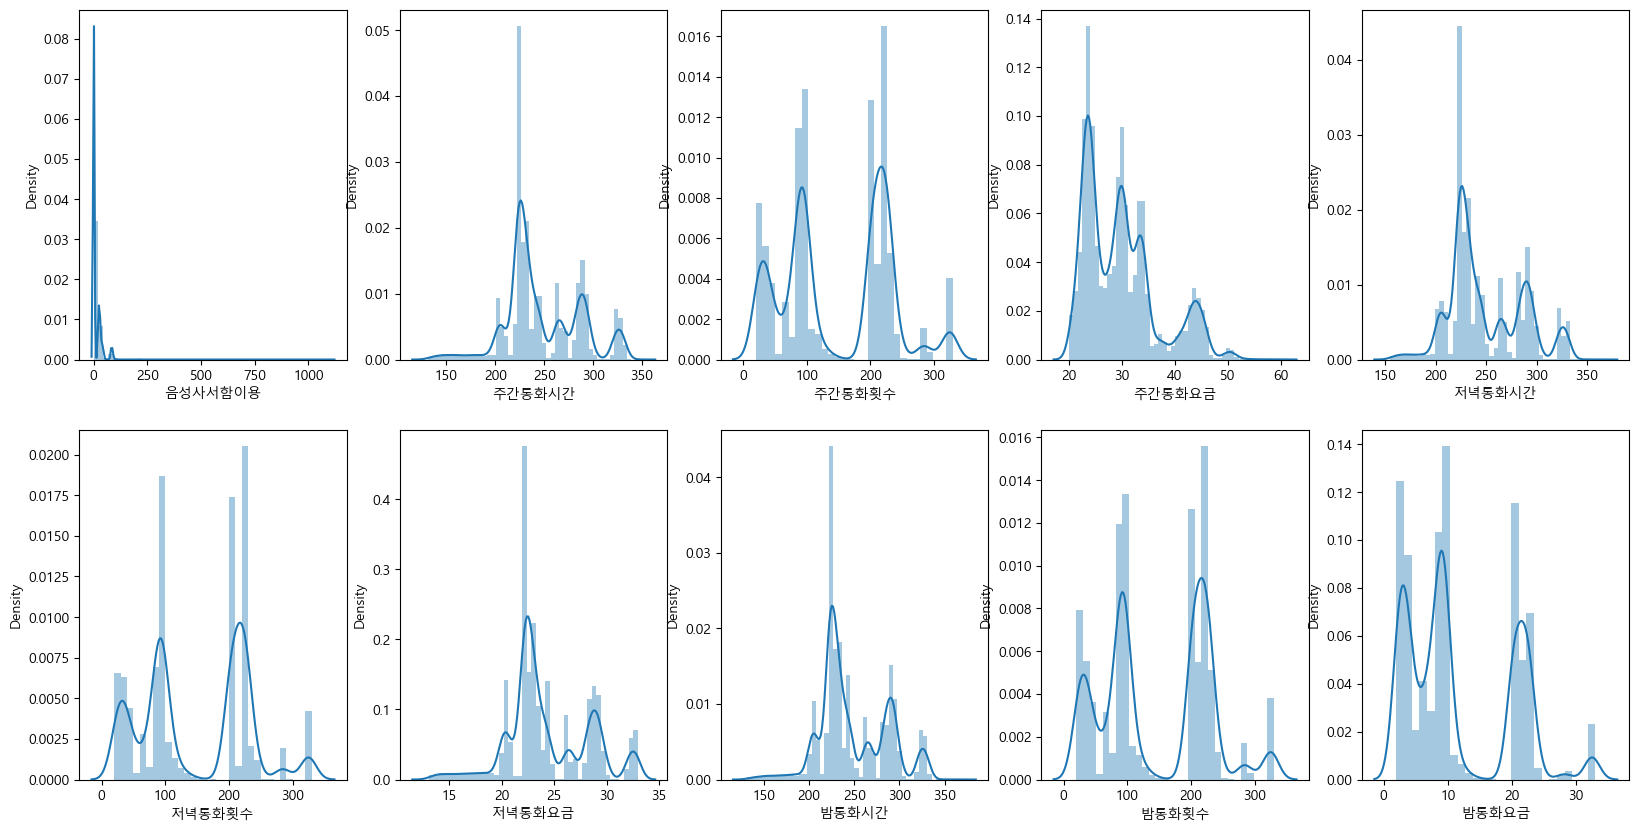

In [223]:
fig, ax = plt.subplots(2,5,figsize=(20,10))

sns.distplot(df_new3['음성사서함이용'], ax=ax[0][0])
sns.distplot(df_new3['주간통화시간'], ax=ax[0][1])
sns.distplot(df_new3['주간통화횟수'], ax=ax[0][2])
sns.distplot(df_new3['주간통화요금'], ax=ax[0][3])
sns.distplot(df_new3['저녁통화시간'], ax=ax[0][4])
sns.distplot(df_new3['저녁통화횟수'], ax=ax[1][0])
sns.distplot(df_new3['저녁통화요금'], ax=ax[1][1])
sns.distplot(df_new3['밤통화시간'], ax=ax[1][2])
sns.distplot(df_new3['밤통화횟수'], ax=ax[1][3])
sns.distplot(df_new3['밤통화요금'], ax=ax[1][4])

In [224]:
scaler = MinMaxScaler()

In [225]:
scaler.fit(df_new3[['음성사서함이용']])
df_new3['음성사서함이용'] = scaler.transform(df_new3[['음성사서함이용']])

<AxesSubplot:xlabel='음성사서함이용', ylabel='Density'>

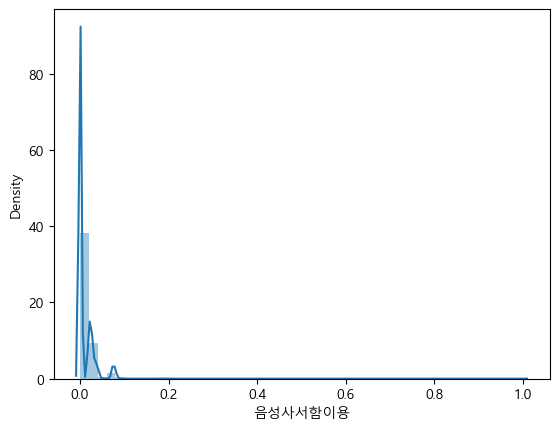

In [226]:
sns.distplot(df_new3['음성사서함이용'])

<AxesSubplot:xlabel='주간통화시간', ylabel='Density'>

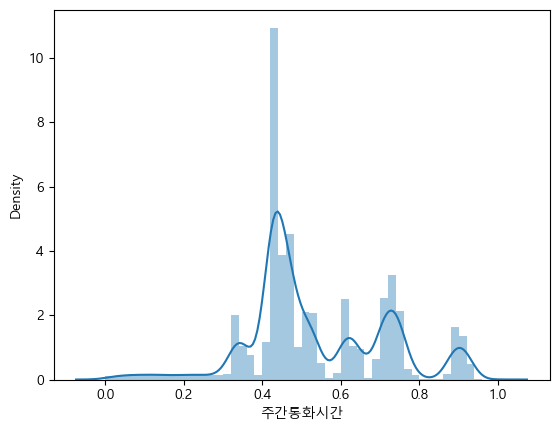

In [227]:
scaler.fit(df_new3[['주간통화시간']])
df_new3['주간통화시간']= scaler.transform(df_new3[['주간통화시간']])
sns.distplot(df_new3['주간통화시간'])

<AxesSubplot:xlabel='주간통화횟수', ylabel='Density'>

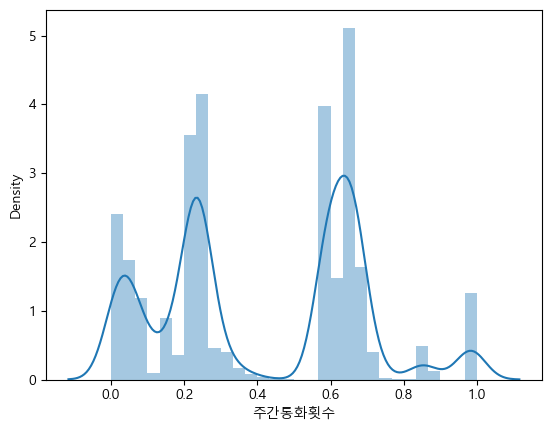

In [228]:
scaler.fit(df_new3[['주간통화횟수']])
df_new3['주간통화횟수']= scaler.transform(df_new3[['주간통화횟수']])
sns.distplot(df_new3['주간통화횟수'])

<AxesSubplot:xlabel='주간통화요금', ylabel='Density'>

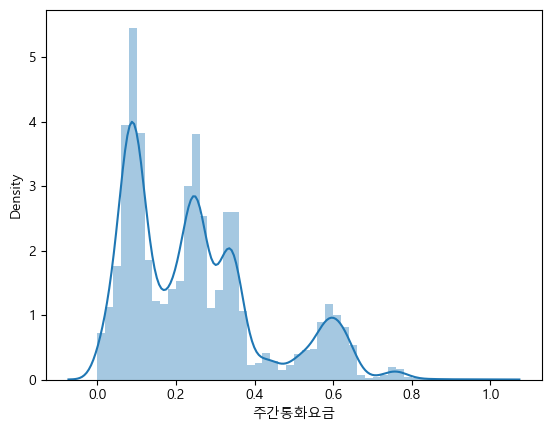

In [229]:
scaler.fit(df_new3[['주간통화요금']])
df_new3['주간통화요금']= scaler.transform(df_new3[['주간통화요금']])
sns.distplot(df_new3['주간통화요금'])

<AxesSubplot:xlabel='저녁통화시간', ylabel='Density'>

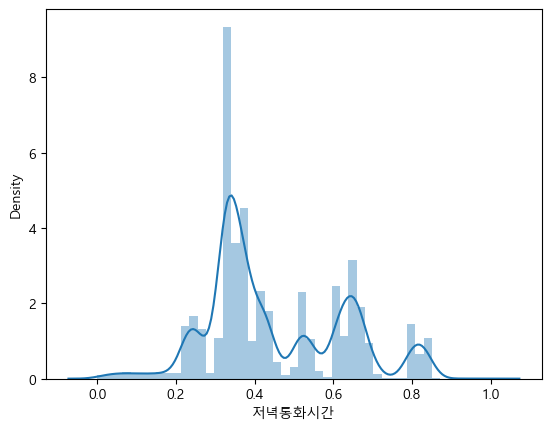

In [230]:
scaler.fit(df_new3[['저녁통화시간']])
df_new3['저녁통화시간']= scaler.transform(df_new3[['저녁통화시간']])
sns.distplot(df_new3['저녁통화시간'])

In [231]:
scaler.fit(df_new3[['저녁통화횟수']])
df_new3['저녁통화횟수']= scaler.transform(df_new3[['저녁통화횟수']])

scaler.fit(df_new3[['저녁통화요금']])
df_new3['저녁통화요금']= scaler.transform(df_new3[['저녁통화요금']])

scaler.fit(df_new3[['밤통화시간']])
df_new3['밤통화시간']= scaler.transform(df_new3[['밤통화시간']])

scaler.fit(df_new3[['밤통화횟수']])
df_new3['밤통화횟수']= scaler.transform(df_new3[['밤통화횟수']])

scaler.fit(df_new3[['밤통화요금']])
df_new3['밤통화요금']= scaler.transform(df_new3[['밤통화요금']])

<AxesSubplot:xlabel='밤통화요금', ylabel='Density'>

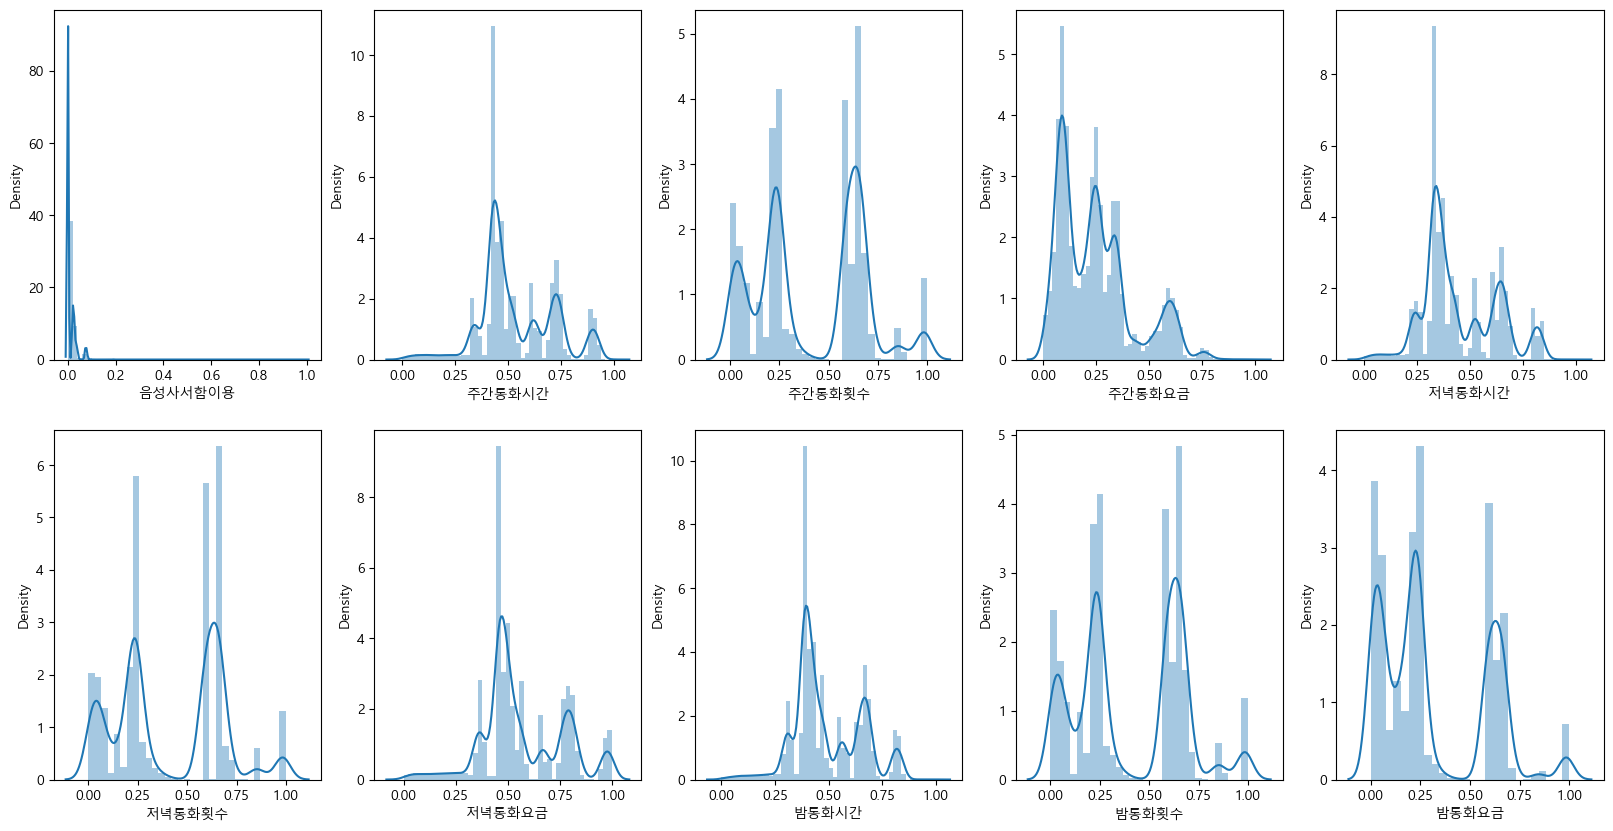

In [232]:
fig, ax = plt.subplots(2,5,figsize=(20,10))

sns.distplot(df_new3['음성사서함이용'], ax=ax[0][0])
sns.distplot(df_new3['주간통화시간'], ax=ax[0][1])
sns.distplot(df_new3['주간통화횟수'], ax=ax[0][2])
sns.distplot(df_new3['주간통화요금'], ax=ax[0][3])
sns.distplot(df_new3['저녁통화시간'], ax=ax[0][4])
sns.distplot(df_new3['저녁통화횟수'], ax=ax[1][0])
sns.distplot(df_new3['저녁통화요금'], ax=ax[1][1])
sns.distplot(df_new3['밤통화시간'], ax=ax[1][2])
sns.distplot(df_new3['밤통화횟수'], ax=ax[1][3])
sns.distplot(df_new3['밤통화요금'], ax=ax[1][4])

In [148]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

In [160]:
# temp = df_new3.drop(['ID', '전화해지여부'], axis=1)
# temp

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0
7,290,1,223.9,99,31.0,294.2,203,26.82,290.1,209,22.66,0
10,221,28,283.6,22,27.5,223.3,93,22.68,283.2,93,8.80,2
12,44,0,224.0,222,30.5,222.9,224,29.22,229.3,41,9.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30190,234,1,230.8,202,39.2,224.0,220,23.02,223.7,230,2.32,2
30193,232,0,294.5,222,40.9,244.8,203,20.22,221.6,94,20.42,2
30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2
30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2


In [161]:
# scaler = StandardScaler()
# temp = scaler.fit_transform(temp)
# temp

array([[-0.53673903,  0.74721673,  0.94802666, ...,  2.15176829,
        -0.4015906 , -1.14234547],
       [ 0.79498094, -0.42081419, -0.66174651, ...,  1.04079767,
        -0.26927244, -1.14234547],
       [ 1.48132892, -0.42081419, -0.5957722 , ...,  0.74532675,
         1.36020116, -1.14234547],
       ...,
       [ 1.20474093,  2.99675776,  1.13803267, ..., -0.94476686,
        -0.27907379, -0.05264431],
       [-1.24357501, -0.4640746 , -0.63535678, ..., -0.6020206 ,
        -0.89900886, -0.05264431],
       [-0.84405902, -0.42081419,  0.42023218, ...,  0.72168908,
         1.14212124, -0.05264431]])

In [162]:
# pca = PCA()
# pca.fit(temp)

PCA()

In [163]:
# print(pca.explained_variance_)
# print(pca.explained_variance_ratio_)

[2.56112207 1.04796065 1.01895601 1.0025071  0.98681636 0.95179976
 0.93556835 0.91652903 0.88244536 0.64922163 0.55851031 0.48922371]
[0.2134151  0.08732525 0.08490833 0.08353766 0.08223017 0.07931228
 0.07795974 0.07637322 0.07353307 0.05409883 0.04653996 0.0407664 ]


In [164]:
# sum = 0
# for i, ratio in enumerate(pca.explained_variance_ratio_):
#     sum += ratio
#     print(f'{sum} by PCA{i}')

0.21341509546502577 by PCA0
0.30074034470899913 by PCA1
0.38564867305589745 by PCA2
0.46918633417192246 by PCA3
0.5514165058438932 by PCA4
0.630728787914031 by PCA5
0.7086885270315622 by PCA6
0.7850617435349462 by PCA7
0.8585948105554891 by PCA8
0.9126936358275816 by PCA9
0.9592336003528863 by PCA10
1.0 by PCA11


In [165]:
# temp = pca.fit_transform(temp)
# temp = pd.DataFrame(temp)
# temp

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.184611,-0.899209,0.370065,0.416017,2.509878,0.122910,-1.821915,-0.199666,1.598971,-0.957189,-1.048859,1.859224
1,0.908245,0.062536,0.125698,-0.445971,1.312125,-2.013062,0.183289,-0.007987,0.026278,0.638079,-0.550885,0.141513
2,-1.477603,-0.396955,-0.080186,0.704036,0.598265,-0.716033,0.819653,-1.915432,-0.682135,0.374660,1.308081,0.332377
3,-0.002891,0.119513,1.034874,0.087885,-0.536210,0.420727,1.053533,-0.036201,-1.210322,-1.474088,-0.494915,-0.573580
4,0.331319,0.199243,-1.479589,0.044091,0.437017,1.058234,-0.531325,0.670853,0.196073,0.338519,-0.456514,1.559229
...,...,...,...,...,...,...,...,...,...,...,...,...
18169,0.617545,-1.073026,0.480118,-1.351637,1.261129,0.243778,0.076241,-0.546833,1.292261,0.110596,0.133196,0.345978
18170,-0.063704,-1.391667,-0.961944,0.297198,0.071060,0.577622,1.257195,-0.571392,1.546688,0.246282,-0.695888,-1.161533
18171,-1.941706,1.493749,1.274165,1.060073,1.970830,2.139502,0.988635,0.932257,0.053998,1.451984,-1.232494,-0.088559
18172,1.104101,0.724591,-0.091996,-0.280835,-1.056385,-0.381940,-0.771172,0.611984,-1.903574,-1.439048,0.669439,-0.044836


In [166]:
# df_new3

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
7,TRAIN_00007,290,1,223.9,99,31.0,294.2,203,26.82,290.1,209,22.66,0,0
10,TRAIN_00010,221,28,283.6,22,27.5,223.3,93,22.68,283.2,93,8.80,2,0
12,TRAIN_00012,44,0,224.0,222,30.5,222.9,224,29.22,229.3,41,9.44,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30190,TRAIN_30190,234,1,230.8,202,39.2,224.0,220,23.02,223.7,230,2.32,2,0
30193,TRAIN_30193,232,0,294.5,222,40.9,244.8,203,20.22,221.6,94,20.42,2,0
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0


In [177]:
# df_new3 = df_new3.reset_index()
# df_new3

,level_0,index,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,0,2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
1,1,3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
2,2,7,TRAIN_00007,290,1,223.9,99,31.0,294.2,203,26.82,290.1,209,22.66,0,0
3,3,10,TRAIN_00010,221,28,283.6,22,27.5,223.3,93,22.68,283.2,93,8.80,2,0
4,4,12,TRAIN_00012,44,0,224.0,222,30.5,222.9,224,29.22,229.3,41,9.44,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,18169,30190,TRAIN_30190,234,1,230.8,202,39.2,224.0,220,23.02,223.7,230,2.32,2,0
18170,18170,30193,TRAIN_30193,232,0,294.5,222,40.9,244.8,203,20.22,221.6,94,20.42,2,0
18171,18171,30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
18172,18172,30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0


In [178]:
# temp.iloc[:, 0:9]

,0,1,2,3,4,5,6,7,8
0,-2.184611,-0.899209,0.370065,0.416017,2.509878,0.122910,-1.821915,-0.199666,1.598971
1,0.908245,0.062536,0.125698,-0.445971,1.312125,-2.013062,0.183289,-0.007987,0.026278
2,-1.477603,-0.396955,-0.080186,0.704036,0.598265,-0.716033,0.819653,-1.915432,-0.682135
3,-0.002891,0.119513,1.034874,0.087885,-0.536210,0.420727,1.053533,-0.036201,-1.210322
4,0.331319,0.199243,-1.479589,0.044091,0.437017,1.058234,-0.531325,0.670853,0.196073
...,...,...,...,...,...,...,...,...,...
18169,0.617545,-1.073026,0.480118,-1.351637,1.261129,0.243778,0.076241,-0.546833,1.292261
18170,-0.063704,-1.391667,-0.961944,0.297198,0.071060,0.577622,1.257195,-0.571392,1.546688
18171,-1.941706,1.493749,1.274165,1.060073,1.970830,2.139502,0.988635,0.932257,0.053998
18172,1.104101,0.724591,-0.091996,-0.280835,-1.056385,-0.381940,-0.771172,0.611984,-1.903574


In [179]:
# df_new4 = pd.concat([df_new3, temp.iloc[:, 0:9]], axis=1)

In [180]:
# df_new4

,level_0,index,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,...,전화해지여부,0,1,2,3,4,5,6,7,8
0,0,2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,...,0,-2.184611,-0.899209,0.370065,0.416017,2.509878,0.122910,-1.821915,-0.199666,1.598971
1,1,3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,...,0,0.908245,0.062536,0.125698,-0.445971,1.312125,-2.013062,0.183289,-0.007987,0.026278
2,2,7,TRAIN_00007,290,1,223.9,99,31.0,294.2,203,...,0,-1.477603,-0.396955,-0.080186,0.704036,0.598265,-0.716033,0.819653,-1.915432,-0.682135
3,3,10,TRAIN_00010,221,28,283.6,22,27.5,223.3,93,...,0,-0.002891,0.119513,1.034874,0.087885,-0.536210,0.420727,1.053533,-0.036201,-1.210322
4,4,12,TRAIN_00012,44,0,224.0,222,30.5,222.9,224,...,0,0.331319,0.199243,-1.479589,0.044091,0.437017,1.058234,-0.531325,0.670853,0.196073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,18169,30190,TRAIN_30190,234,1,230.8,202,39.2,224.0,220,...,0,0.617545,-1.073026,0.480118,-1.351637,1.261129,0.243778,0.076241,-0.546833,1.292261
18170,18170,30193,TRAIN_30193,232,0,294.5,222,40.9,244.8,203,...,0,-0.063704,-1.391667,-0.961944,0.297198,0.071060,0.577622,1.257195,-0.571392,1.546688
18171,18171,30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,...,0,-1.941706,1.493749,1.274165,1.060073,1.970830,2.139502,0.988635,0.932257,0.053998
18172,18172,30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,...,0,1.104101,0.724591,-0.091996,-0.280835,-1.056385,-0.381940,-0.771172,0.611984,-1.903574


In [233]:
train_x = df_new3.copy().drop(['ID', '전화해지여부'], axis=1)
train_y = df_new3['전화해지여부']

In [234]:
from sklearn.ensemble import RandomForestClassifier

import random
import os
import numpy as np

In [235]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [236]:
test = pd.read_csv('./data/test.csv')
test = test.drop('ID', axis=1)

In [237]:
model =  RandomForestClassifier(random_state=37).fit(train_x, train_y)

In [238]:
pred = model.predict(test)

In [239]:
submit = pd.read_csv('./data/sample_submission.csv')

In [240]:
submit['전화해지여부'] = pred
submit.head()

,ID,전화해지여부
0,TEST_00000,1
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,1
4,TEST_00004,1


In [241]:
submit.to_csv('./result/EDA_re(7).csv', index=False)